# Policy Briefing Title

## CASA0013: Foundations of Spatial Data Science

### Student Ids: zcfajej, ucfnafk, and ucfnwig

In [16]:
# Import required libraries

import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [3]:
# Set download URL
path = 'http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/data/listings.csv.gz'
url  = f'{path}'

# read data
df = pd.read_csv(url, compression='gzip', low_memory=False)
print(f"Data frame is {df.shape[0]:,} x {df.shape[1]}")

Data frame is 69,351 x 75


In [4]:
df.describe(percentiles=[.05,0.75])

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,6.935100e+04,6.935100e+04,6.935100e+04,69346.000000,69346.000000,0.0,69351.000000,69351.000000,69351.000000,0.0,...,51515.000000,51548.000000,51517.000000,51514.000000,0.0,69351.000000,69351.000000,69351.000000,69351.000000,52571.000000
mean,1.373703e+17,2.022091e+13,1.242124e+08,31.047112,54.256035,NaN,51.509544,-0.128489,3.075255,NaN,...,4.790880,4.803499,4.739017,4.620849,NaN,11.987498,9.001355,2.811437,0.031391,0.882593
std,2.651479e+17,6.796924e-01,1.377104e+08,180.459655,336.219638,NaN,0.049182,0.100957,1.940233,NaN,...,0.454214,0.453838,0.420715,0.519731,NaN,37.148839,31.697957,15.762046,0.506464,1.274510
min,1.391300e+04,2.022091e+13,4.775000e+03,1.000000,1.000000,NaN,51.272480,-0.523600,0.000000,NaN,...,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,0.000000,0.000000,0.000000,0.010000
5%,4.530436e+06,2.022091e+13,2.125620e+06,1.000000,1.000000,NaN,51.420590,-0.300245,1.000000,NaN,...,4.000000,4.000000,4.000000,3.840000,NaN,1.000000,0.000000,0.000000,0.000000,0.020000
50%,3.395467e+07,2.022091e+13,6.010350e+07,2.000000,2.000000,NaN,51.513600,-0.126200,2.000000,NaN,...,4.950000,4.980000,4.860000,4.750000,NaN,1.000000,1.000000,0.000000,0.000000,0.430000
75%,5.265645e+07,2.022091e+13,1.960405e+08,5.000000,7.000000,NaN,51.539710,-0.068550,4.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,4.000000,2.000000,1.000000,0.000000,1.080000
max,7.123951e+17,2.022091e+13,4.788540e+08,2157.000000,23950.000000,NaN,51.708930,0.305150,16.000000,NaN,...,5.000000,5.000000,5.000000,5.000000,NaN,285.000000,282.000000,219.000000,19.000000,51.330000


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69351 entries, 0 to 69350
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            69351 non-null  int64  
 1   listing_url                                   69351 non-null  object 
 2   scrape_id                                     69351 non-null  int64  
 3   last_scraped                                  69351 non-null  object 
 4   source                                        69351 non-null  object 
 5   name                                          69330 non-null  object 
 6   description                                   67832 non-null  object 
 7   neighborhood_overview                         39964 non-null  object 
 8   picture_url                                   69351 non-null  object 
 9   host_id                                       69351 non-null 

In [6]:
# Saving file locally 
path = os.path.join('data','raw') # A default location to save raw data
fn   = url.split('/')[-1]         
print(f"Writing to: {fn}")

Writing to: listings.csv.gz


In [7]:
if not os.path.exists(path):
    print(f"Creating {path} under {os.getcwd()}")
    os.makedirs(path)
    
df.to_csv(os.path.join(path,fn), index=False)
print("Done.")

Creating data/raw under /home/jovyan/work/fsds-Jon/Hansen/assignment/2/FSDS_group_smartcityzen
Done.


In [8]:
# print list of columns
print(df.columns.to_list())

['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availabil

In [10]:
#open all columns
pd.set_option('display.max_columns', None)

In [11]:
df.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,20220910194334,2022-09-11,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a day,80%,70%,f,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,4.0,"['email', 'phone']",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Oven"", ""Fire e...",$50.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,17,38,68,343,2022-09-11,30,9,0,2010-08-18,2022-07-15,4.90,4.82,4.89,4.86,4.93,4.75,4.82,NaN,f,2,1,1,0,0.20
1,15400,https://www.airbnb.com/rooms/15400,20220910194334,2022-09-11,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Kensington, United Kingdom","English, grandmother, I have travelled quite ...",within an hour,67%,29%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,12.0,"['email', 'phone']",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Hair dryer"", ""Hangers"",...",$75.00,3,50,3.0,3.0,50.0,50.0,3.0,50.0,NaN,t,2,2,2,70,2022-09-11,89,0,0,2009-12-21,2020-03-16,4.79,4.84,4.88,4.87,4.82,4.93,4.73,NaN,f,1,1,0,0,0.57
2,284532,https://www.airbnb.com/rooms/284532,20220910194334,2022-09-11,city scrape,COSY STUDIO-FLAT WITH A GREAT VIEW,My very RECENTLY RENOVATED flat is located in ...,Shoreditch is simply the coolest area in London!,https://a0.muscache.com/pictures/2932872/00037...,1481412,https://www.airbnb.com/users/show/1481412,Luca,2011-12-07,"London, United Kingdom","Hi there,my name is Luca and I'm a 40 year old...",within a day,90%,67%,f,https://a0.muscache.com/im/users/1481412/profi...,https://a0.muscache.com/im/users/1481412/profi...,Shoreditch,1.0,3.0,"['email', 'phone']",t,t,"London, United Kingdom",Tower Hamlets,NaN,51.52851,-0.07426,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,2.0,"[""Extra pillows and blankets"", ""Oven"", ""Cleani...",$90.00,5,365,5.0,5.0,365.0,365.0,5.0,365.0,NaN,t,1,1,1,222,2022-09-11,42,1,0,2012-08-19,2022-01-04,4.32,4.53,4.03,4.72

In [12]:
cols = ['id', 'listing_url', 'last_scraped', 'name', 'description', 'host_id', 'host_name', 
        'host_since', 'host_location', 'host_about', 'host_is_superhost', 
        'host_listings_count', 'host_total_listings_count', 'latitude', 'longitude', 
        'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 
        'amenities', 'price', 'minimum_nights', 'maximum_nights', 'availability_365', 'number_of_reviews', 
        'first_review', 'last_review', 'review_scores_rating', 'license', 'reviews_per_month', 'neighbourhood_cleansed']

In [14]:
df_test = pd.read_csv(os.path.join(path,fn), 
                low_memory=False, usecols=cols, nrows=6000)

print(f"Data frame is {df_test.shape[0]:,} x {df_test.shape[1]}")

Data frame is 6,000 x 34


In [15]:
df_test.head(3)

,id,listing_url,last_scraped,name,description,host_id,host_name,host_since,host_location,host_about,host_is_superhost,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,license,reviews_per_month
0,13913,https://www.airbnb.com/rooms/13913,2022-09-11,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,f,3.0,4.0,Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,NaN,1 shared bath,1.0,1.0,"[""Extra pillows and blankets"", ""Oven"", ""Fire e...",$50.00,1,29,343,30,2010-08-18,2022-07-15,4.90,NaN,0.20
1,15400,https://www.airbnb.com/rooms/15400,2022-09-11,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,60302,Philippa,2009-12-05,"Kensington, United Kingdom","English, grandmother, I have travelled quite ...",f,1.0,12.0,Kensington and Chelsea,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Fire extinguisher"", ""Hair dryer"", ""Hangers"",...",$75.00,3,50,70,89,2009-12-21,2020-03-16,4.79,NaN,0.57
2,284532,https://www.airbnb.com/rooms/284532,2022-09-11,COSY STUDIO-FLAT WITH A GREAT VIEW,My very RECENTLY RENOVATED flat is located in ...,1481412,Luca,2011-12-07,"London, United Kingdom","Hi there,my name is Luca and I'm a 40 year old...",f,1.0,3.0,Tower Hamlets,51.52851,-0.07426,Entire rental unit,Entire home/apt,2,NaN,1 bath,NaN,2.0,"[""Extra pillows and blankets"", ""Oven"", ""Cleani...",$90.00,5,365,222,42,2012-08-19,2022-01-04,4.32,NaN,0.34


### Read Geodata

In [17]:
# Set download URL
path2 = 'http://data.insideairbnb.com/united-kingdom/england/london/2022-09-10/visualisations/neighbourhoods.geojson'
url2  = f'{path2}'

# read data
borough = gpd.read_file(url2)

In [18]:
# Check the projection
print(borough.crs)

epsg:4326


<AxesSubplot:>

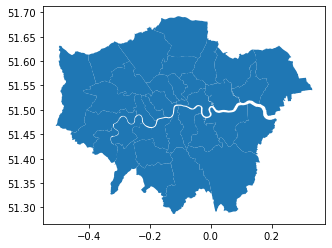

In [19]:
# Check the data
borough.plot()

In [20]:
os.getcwd()

'/home/jovyan/work/fsds-Jon/Hansen/assignment/2/FSDS_group_smartcityzen'

In [21]:
# read ward data
ward = gpd.read_file('data/ward/London-wards-2018/London-wards-2018_ESRI/London_Ward_CityMerged.shp')

In [22]:
# Check the projection
print(ward.crs)

epsg:27700


<AxesSubplot:>

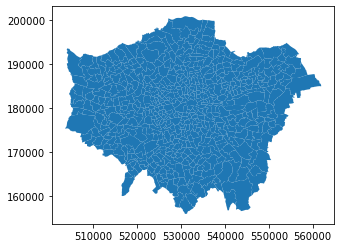

In [24]:
# Check the data
ward.plot()